In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm

# Lecture 7: Machine Learning

As you already know, data science is about collecting data, cleaning/formatting data and, most importantly, understanding data. This is where machine learning comes in. Today, we will discuss about machine learning and its concept in general. Machine learning is extremely useful tool for building/training models that will help data scientists answer questions about the data.


## Modeling

A model is a specification of a mathematical (or probabilistic) relationship that exists between different variables. There are a wide range of models. Some models are just simple mathematical relationships between two or more variables. Some models are based on probability theory. We call them, probabilistic models.

In [23]:
# first-order model
def fo_height(weight):
    return weight+100

# second-order model
def so_height(weight):
    return ((weight/24.0)**0.5)*100

# probabilistic model
def prob_height(weight):
    mu = ((weight/24.0)**0.5)*100 
    sigma = 10
    x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
    plt.plot(x,norm.pdf((x-mu)/sigma),'-r')

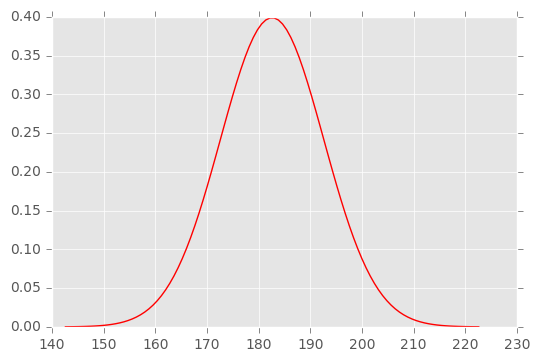

In [25]:
prob_height(80)

## Machine Learning

You can think of machine learning as a process of creating and using models that are *learned from data*. Typically our goal will be to use collected data to develop models that we can use to *predict* various outcomes for new data such as:
- Predicting whether an email is spam or not
- Predicting whether a credit card transaction is fradulent
- Predicting which advertisement a shopper is most likely to click on
- Predicting which football team is going to win the World cup

As the term goes on, we will look at how to use machine learning to train various models such as:
- supervised models -- data is labeled
- unsupervised models -- data is unlabeled
- semisupervised models -- partly labeled data
- online models -- models that adapt to new data that is streaming in

Typically, we will first choose a *parameterized* family of models then use data to learn the "best" parameters. More details in the future lectures.

## Overfitting and Underfitting

- Overfitting -- producing a model that performs well on the data we train it on but generalizes poorly to new data
- Underfitting -- producing a model that doesn't perform well even on the training data

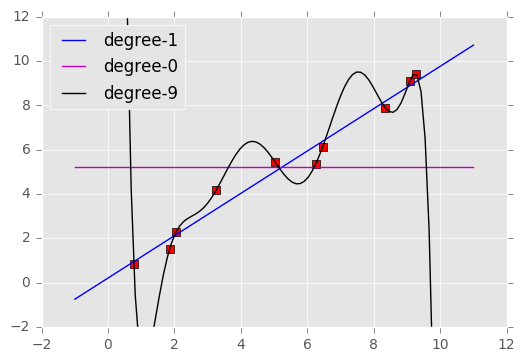

In [108]:
np.random.seed(101)
x = np.array([i + np.random.rand(1)*1.5 for i in range(10)]).reshape((10,))
y = np.array([i + np.random.rand(1)*1.5 for i in range(10)]).reshape((10,))
plt.plot(x,y,'sr')
p0 = np.poly1d(np.polyfit(x,y,0))
p1 = np.poly1d(np.polyfit(x,y,1))
p9 = np.poly1d(np.polyfit(x,y,9))
nx = np.linspace(-1,11,100)
plt.plot(nx,p1(nx),'-b',label="degree-1")
plt.plot(nx,p0(nx),'-m',label="degree-0")
plt.plot(nx,p9(nx),'-k',label="degree-9")
plt.ylim([-2,12])
plt.legend(loc=2)

In [54]:
np.random.seed(112)
n1 = 6
n2 = 6
x1 = np.random.randn(n1)+2
x2 = np.random.randn(n2)

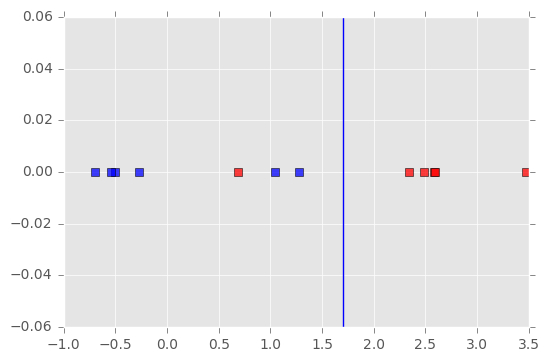

In [58]:
plt.plot(x1,np.zeros(n1),'sr',alpha=0.75)
plt.plot(x2,np.zeros(n2),'sb',alpha=0.75)
plt.axvline(x=1.7)

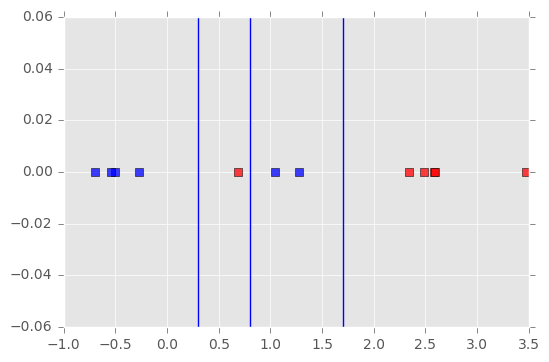

In [60]:
plt.plot(x1,np.zeros(n1),'sr',alpha=0.75)
plt.plot(x2,np.zeros(n2),'sb',alpha=0.75)
plt.axvline(x=1.7)
plt.axvline(x=0.8)
plt.axvline(x=0.3)

In [62]:
np.random.seed(112)
n1 = 20
n2 = 20
x1 = np.random.randn(n1)+2
x2 = np.random.randn(n2)

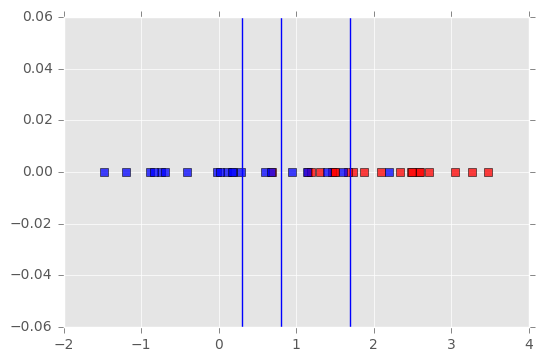

In [63]:
plt.plot(x1,np.zeros(n1),'sr',alpha=0.75)
plt.plot(x2,np.zeros(n2),'sb',alpha=0.75)
plt.axvline(x=1.7)
plt.axvline(x=0.8)
plt.axvline(x=0.3)

## How to deal with Overfitting

How do we know if our model is overfitting? A fundamental way to check is to use different set of data for training the model and for testing the model.

It is common to split our data set into train and test set. For example, we use about 75% for training the model and 25% for testing. If the model was overfit to the training data, then it will perform poorly on the test data. On the other hand, if the model performs well on the test data, then we gain some confident that our model generalizes quite well.

Sometimes, you might want to train multiple models and then choose the "best" performing one. The common practice is to have another set of data called *validation set* for this purpose. To summarize:
 - training set -- for training models
 - validation set -- for choosing model and/or tuning params
 - test set -- for evaluating the final model

## Correctness of Models

How do we know if a preditive model is performing well or not? For each prediction, there are total of 4 outcomes:
 - True positive
 - False positive (Type 1 Error)
 - False negative (Type 2 Error)
 - True negative
 
For example, consider a not-so-smart predictive model that predicts the person has cancer if his name is Tommy.

<table>
<tr>
<td></td><td>cancer</td><td>no cancer</td>
</tr>
<tr>
<td>Tommy</td><td>50</td><td>5000</td>
</tr>
<tr>
<td>not Tommy</td><td>15000</td><td>950000</td>
</tr>
</table>

Now let's compute: accuracy, precision, recall, and f1_score

## In-class exercise
Try to come up with a simple model for predicting class of leaves and report the accuracy, precision, recall, and f1_score of your model on the test set.